# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivos**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)

La metodología de Segmentación de Clientes es una herramienta poderosa que se usa en diferentes industrias, desde la banca, turismo y la industria de consumo masivo. Cada vez las empresas quieren conocer mejor a sus clientes por medio de las diferentes fuentes de datos que
tienen disponibles con la información de estos clientes.


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha y hora de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.
--- 
Empezamos utilizando la librería Pandas de Python, a continuación cargamos el archivo csv para después obtener una muestra aleatoria del dataset. Empleando el método info() tenemos una mejor visión de la información de las columnas, los valores y los tipos de datos que existen dentro del dataset.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [3]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')
raw = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [4]:
df.sample(10)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY   
493452     578233      23121  PACK OF 6 COCKTAIL PARASOL STRAWS         1  \
526620     580673      22699   ROSES REGENCY TEACUP AND SAUCER         24   
411976     572242      22952    60 CAKE CASES VINTAGE CHRISTMAS        24   
481822     577359      22115              METAL SIGN EMPIRE TEA         2   
479013     577126      23101      SILVER STARS TABLE DECORATION        24   
443727     574709      22629                SPACEBOY LUNCH BOX          3   
265743     560225     84509A    SET OF 4 ENGLISH ROSE PLACEMATS         3   
220346     556184      20725            LUNCH BAG RED RETROSPOT        30   
477122     577050     15044D                  RED PAPER PARASOL         6   
271913     560723      21755           LOVE BUILDING BLOCK WORD         1   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
493452  23/11/2020 12:20        0.42      14049.0  United Kingdom  
526620  05/12/2020 14:30        2.55      13089.0  United Kingdom  
411976  21/10/2020 15:36        0.55      15677.0  United Kingdom  
481822  18/11/2020 16:07        0.79      14903.0  United Kingdom  
479013  17/11/2020 19:22        0.83      12406.0         Denmark  
443727  06/11/2020 14:14        1.95      17768.0  United Kingdom  
265743  15/07/2020 16:27        3.29          NaN  United Kingdom  
220346  09/06/2020 11:39        1.65      16592.0  United Kingdom  
477122  17/11/2020 13:59        2.95      14191.0  United Kingdom  
271913  20/07/2020 13:53        5.95      16464.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.
---
Basándonos en la información obtenida del método info(), se recomienda convertir el tipo de dato de la columna 'FECHA_FACTURA' a un formato de fecha y hora, y 'ID_CLIENTE' a un formato numérico. Esto permitirá un procesamiento de datos más eficiente.


In [6]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [7]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [8]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 
---
El análisis realizado mediante el método `describe() reveló la presencia de valores atípicos en las columnas 'QUANTITY' y 'UNIT_PRICE’, los cuales se manifiestan como números negativos. Estos valores podrían afectar negativamente la precisión de los análisis posteriores y distorsionar los resultados. Por lo tanto, se recomienda realizar una investigación más profunda para identificar la causa de estos valores atípicos y determinar el curso de acción adecuado, ya sea su eliminación, corrección o imputación.



In [9]:
df.describe().T

count                           mean                  min   
QUANTITY      541909.0                        9.55225             -80995.0  \
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%   
QUANTITY                      1.0                  3.0                 10.0  \
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [10]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: title={'center': 'Boxplot de cantidad de producto'}, xlabel='QUANTITY'>

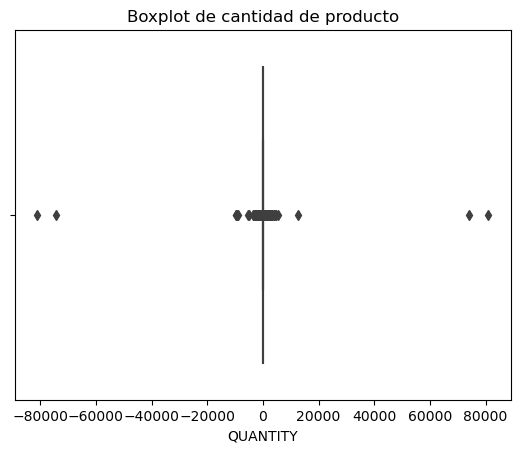

In [11]:
plt.title('Boxplot de cantidad de producto')
sns.boxplot(x=df['QUANTITY'])

La utilización de un diagrama de caja nos permitió visualizar la distribución de los valores en la columna 'QUANTITY' y detectar la presencia de una cantidad significativa de datos atípicos. Estos valores atípicos, ubicados principalmente en los extremos de la distribución, podrían afectar negativamente la representatividad de los datos y sesgar los análisis estadísticos posteriores. Por lo tanto, se recomienda realizar un análisis más profundo para comprender el origen de estos valores y determinar el enfoque adecuado para su tratamiento, ya sea su eliminación, corrección o imputación.

<Axes: title={'center': 'Boxplot de precios unitarios'}, xlabel='UNIT_PRICE'>

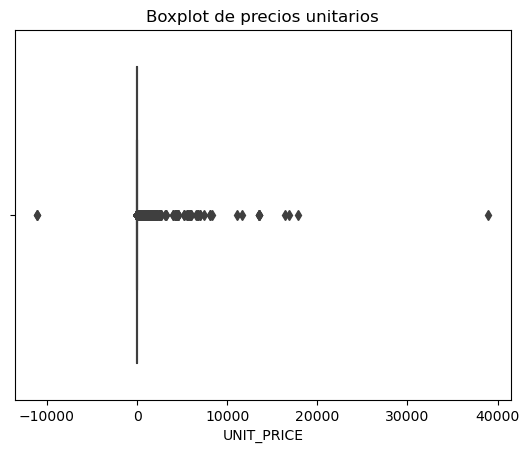

In [12]:
plt.title('Boxplot de precios unitarios')
sns.boxplot(x=df['UNIT_PRICE'])

Al generar un diagrama de caja para la columna 'UNIT_PRICE', se evidenció la presencia de valores atípicos considerables. Estos valores atípicos, que se encuentran principalmente en los extremos de la distribución, podrían distorsionar la representación general de los precios unitarios. Se recomienda realizar un análisis más profundo para identificar la causa de estos valores atípicos y determinar el curso de acción adecuado, ya sea su eliminación, corrección o imputación, con el objetivo de garantizar la confiabilidad de los datos y la precisión de los análisis.


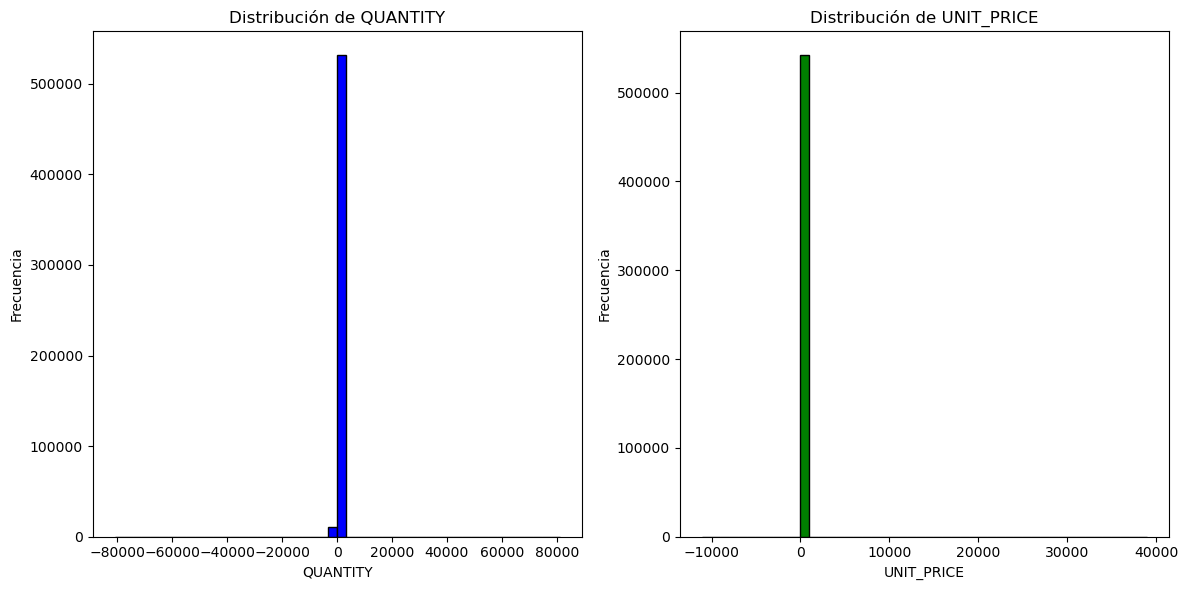

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

El análisis mediante histogramas reveló que la distribución de los valores en las variables 'QUANTITY’ y ‘UNIT_PRICE' presenta una marcada concentración en un rango específico. Esta concentración indica que la mayoría de los datos se agrupan dentro de un intervalo delimitado, mientras que una proporción menor de observaciones se ubican en los extremos de la distribución. Esta característica de la distribución podría ser relevante para la interpretación de los datos y el desarrollo de análisis posteriores.


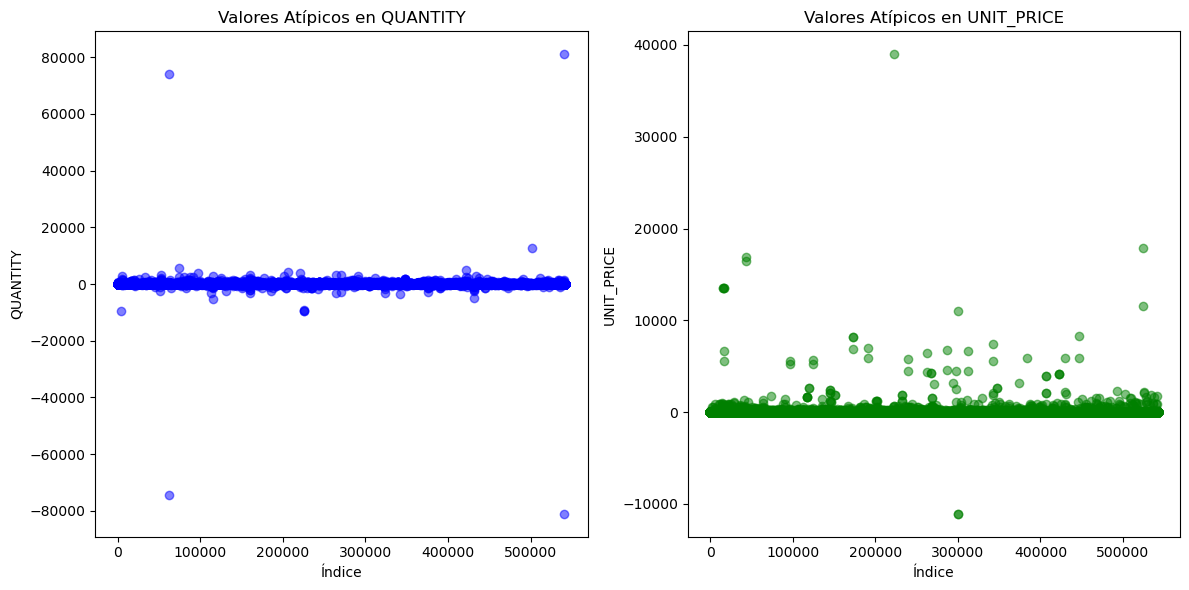

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

La utilización de un diagrama de dispersión nos permite visualizar la relación entre dos variables y, al mismo tiempo, identificar de manera más específica la presencia de valores atípicos. Estos valores atípicos, representados como puntos que se alejan significativamente de la tendencia general del gráfico, pueden ser indicativos de errores en la medición, eventos inusuales o datos excepcionales que requieren un análisis más profundo. Por lo tanto, el diagrama de dispersión se convierte en una herramienta valiosa para depurar el conjunto de datos y garantizar la confiabilidad de los análisis posteriores.


## Tratamiendo de valores ausentes.
---
El análisis de los datos reveló la presencia de una cantidad significativa de valores ausentes en las columnas 'DESCRIPTION' y 'CUSTOMER_ID'. Estos valores ausentes, identificados mediante el método isna(), podrían afectar negativamente la precisión y confiabilidad de los análisis posteriores. Para abordar este problema, se aplicaron técnicas de imputación de datos con el objetivo de rellenar los valores faltantes de manera adecuada. La elección del método de imputación se basó en las características de las variables y la naturaleza de los datos ausentes.
Se espera que la imputación de los valores ausentes contribuya a mejorar la calidad del conjunto de datos y, en consecuencia, la robustez y validez de los análisis estadísticos realizados.
 


In [15]:
#Antes 
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [16]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [17]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [18]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE   
622        536414      22139     unknown        56 2019-12-01 11:52:00  \
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [19]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [20]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

Tras detectar la presencia de valores ausentes en la columna 'DESCRIPTION', se procedió a reemplazar los valores representados por el símbolo '?' con la palabra 'unknown'. Posteriormente, se rellenaron los espacios vacíos restantes con 'unknown' para estandarizar el manejo de los datos faltantes. Una vez completada esta etapa, se calculó el porcentaje de datos categorizados como 'unknown'. Este análisis reveló que la proporción de datos 'unknown' era considerable, lo que llevó a la conclusión de que la eliminación de estos registros podría ser una estrategia más adecuada para el análisis posterior.
La decisión de eliminar los datos 'unknown' se basó en la consideración de que estos valores podrían representar información incompleta o inexacta que podría afectar negativamente la confiabilidad de los resultados. Al eliminar estos registros, se buscaba garantizar la calidad y robustez del conjunto de datos utilizado para el análisis.
 

In [21]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY   
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1  \
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [22]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [23]:

df['CUSTOMER_ID'].fillna(0, inplace=True)

In [24]:
#Después 
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

En un segundo momento, se procedió a analizar la presencia de valores ausentes en la columna 'CUSTOMER_ID'. A diferencia de lo observado en la columna 'DESCRIPTION', el porcentaje de valores ausentes en 'CUSTOMER_ID' resultó ser relativamente bajo. Esta característica, llevó a la decisión de no eliminar los registros con valores ausentes.
En su lugar, se optó por reemplazar los valores ausentes en 'CUSTOMER_ID' por el valor 0. Esta decisión se basó en la consideración de que el valor 0 podría representar de manera adecuada la ausencia de información sobre el identificador del cliente en esos registros específicos. 


## Tratamiento de duplicados.
---
Para eliminar las filas duplicadas del conjunto de datos y garantizar la integridad de la información, se aplicó el método drop_duplicates() de la biblioteca Pandas. Este método permite identificar y eliminar de manera eficiente filas que presentan valores idénticos en todas las columnas especificadas. La implementación de esta técnica contribuyó a depurar el conjunto de datos y a obtener una representación más precisa de la información real.

In [25]:
df = df.drop_duplicates().reset_index(drop=True)

In [26]:
df.duplicated().sum()

0

### Quantity
---
Con el objetivo de aislar los datos que se encuentran por debajo de un umbral específico, se aplicó un filtro a la columna 'QUANTITY'. Este filtro, basado en la expresión `QUANTITY < -2000`, permitió identificar y seleccionar únicamente aquellos registros en los que el valor de 'QUANTITY' era menor a -2000.
Este subconjunto puede ser de utilidad para realizar análisis enfocados en valores atípicos o en eventos excepcionales que se alejan significativamente de la tendencia general de los datos. Es importante destacar que la elección del umbral de -2000 debe considerarse en el contexto del análisis específico y las características de los datos.


In [27]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360  \
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03      15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00          0.0  United Kingdom  
60844  2020-01-18 10:17:00        1.04      12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00          0.0  United Kingdom  
114433 2020-03-09 17:25:00        0.00          0.0  United Kingdom  
129826 2020-03-23 17:28:00        0.00          0.0  United Kingdom  
158057 2020-04-18 13:08:00        2.10      15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00          0.0  United Kingdom  
222766 2020-06-14 10:36:00        0.00          0.0  United Kingdom  
222767 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
222768 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
260766 2020-07-14 14:27:00        0.00          0.0  United Kingdom  
371215 2020-10-04 11:42:00        0.00          0.0  United Kingdom  
426346 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426347 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426349 2020-10-31 15:17:00        0.00          0.0  United Kingdom  
533660 2020-12-09 09:27:00        2.08      16446.0  United Kingdom

In [28]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [29]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

Para comprender la distribución de los valores negativos en la columna 'QUANTITY' y su impacto potencial en el análisis, se calculó el porcentaje de registros con valores negativos. Este análisis reveló que una proporción significativa de los datos en 'QUANTITY' presentaba valores negativos.
En base a este hallazgo y considerando el impacto que los valores negativos podrían tener en la interpretación de los resultados, se tomó la decisión de eliminar del conjunto de datos todos los registros en los que el valor de 'QUANTITY' era menor a 0. Esta decisión se fundamenta en la idea de que los valores negativos en esta columna podrían representar errores de medición, transacciones inusuales o situaciones que no se ajustan al alcance del análisis.


In [30]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114  \
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10      15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04      12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82      18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10      15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72      13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00          0.0  United Kingdom  
267686 2020-07-19 17:04:00        0.06      14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21      12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00      13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08      16446.0  United Kingdom

In [31]:
100*df[df['QUANTITY'] > 3000]['INVOICE_NO'].count()/df.shape[0]

0.0019031089187296368

In [32]:
df.drop(df[df['QUANTITY'] > 3000]['QUANTITY'].index,axis=0,inplace=True)

### Unit Price
---
Con el objetivo de identificar y eliminar registros con valores potencialmente erróneos o inconsistentes, se aplicó un filtro a la columna 'UNIT_PRICE'. Este filtro, basado en la condición `UNIT_PRICE <= 0`, permitió seleccionar únicamente aquellos registros en los que el valor de 'UNIT_PRICE' era menor o igual a 0.
La aplicación de este filtro resultó en la eliminación de un subconjunto de datos que presentaba valores de precio por unidad no razonables. La presencia de estos valores podría deberse a errores de captura de datos, inconsistencias en la codificación o situaciones excepcionales que no se ajustan al contexto del análisis.


In [33]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                         DESCRIPTION  QUANTITY   
191151     553539      22665   RECIPE BOX BLUE SKETCHBOOK DESIGN         1  \
103142     545176      22676       FRENCH BLUE METAL DOOR SIGN 1         1   
415492     572893      21208         PASTEL COLOUR HONEYCOMB FAN         5   
40852      539856      22625                  RED KITCHEN SCALES         7   
110869     545875      21736                          Adjustment        34   
310087     564530      22684       FRENCH BLUE METAL DOOR SIGN 9         1   
191154     553539      22646  CERAMIC STRAWBERRY CAKE MONEY BANK         1   
40871      539856      22357            KINGS CHOICE BISCUIT TIN         7   
14070      537534      21559   STRAWBERRY LUNCH BOX WITH CUTLERY         1   
122555     546933      22627                 MINT KITCHEN SCALES         1   
103129     545176      22300        COFFEE MUG DOG + BALL DESIGN         1   
164508     550952     84531B                            returned         2   
164501     550948     17109D                          Adjustment        14   
103158     545176      22676       FRENCH BLUE METAL DOOR SIGN 1         2   
14020      537534      84832    ZINC WILLIE WINKIE  CANDLE STICK         1   
191139     553539      21559   STRAWBERRY LUNCH BOX WITH CUTLERY         1   
103151     545176      22689        DOORMAT MERRY CHRISTMAS RED          3   
239471     558340      22430           ENAMEL WATERING CAN CREAM         1   
103137     545176     18098C      PORCELAIN BUTTERFLY OIL BURNER         6   
466568     576673      22548                          adjustment         4   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
191151 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
103142 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
415492 2020-10-26 14:36:00         0.0      18059.0  United Kingdom  
40852  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
110869 2020-03-07 15:18:00         0.0          0.0  United Kingdom  
310087 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
191154 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
40871  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
14070  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
122555 2020-03-18 11:02:00         0.0          0.0  United Kingdom  
103129 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
164508 2020-04-21 16:16:00         0.0          0.0  United Kingdom  
164501 2020-04-21 15:56:00         0.0          0.0  United Kingdom  
103158 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
14020  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
191139 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
103151 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
239471 2020-06-28 14:01:00         0.0          0.0  United Kingdom  
103137 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
466568 2020-11-16 11:59:00         0.0          0.0  United Kingdom

In [34]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.1096211599288985

In [35]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

In [36]:
100*df[df['UNIT_PRICE'] > 4000]['INVOICE_NO'].count()/df.shape[0]

0.001333663573837331

In [37]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] > 4000]['UNIT_PRICE'].index,axis=0,inplace=True)

Para evaluar la prevalencia de valores potencialmente erróneos o inconsistentes en la columna 'UNIT_PRICE', se calculó el porcentaje de registros con valores menores o iguales a 0. Este análisis reveló que una proporción considerable de los datos en 'UNIT_PRICE' presentaba valores negativos o nulos.En base a este hallazgo y considerando el impacto potencial de estos valores en la precisión y confiabilidad del análisis, se tomó la decisión de eliminar del conjunto de datos todos los registros en los que el valor de 'UNIT_PRICE' era menor o igual a 0.


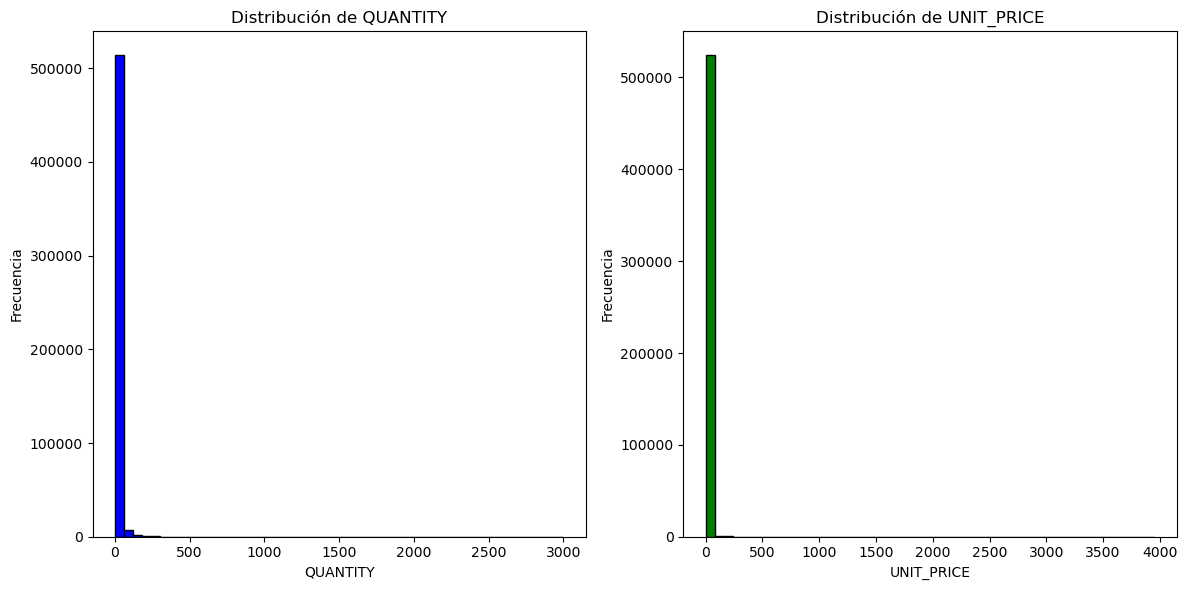

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Para confirmar la eliminación efectiva de los valores negativos en la columna 'UNIT_PRICE', se procedió a generar histogramas de la variable. La observación de estos histogramas permitió verificar que no existían valores negativos en la columna, corroborando así el éxito del proceso de filtrado previo.
La utilización de histogramas como herramienta de visualización resultó ser de gran utilidad para validar la limpieza de datos realizada. Al comparar los histogramas antes y después del filtrado, se pudo identificar de manera clara la ausencia de valores negativos en la columna 'UNIT_PRICE'.


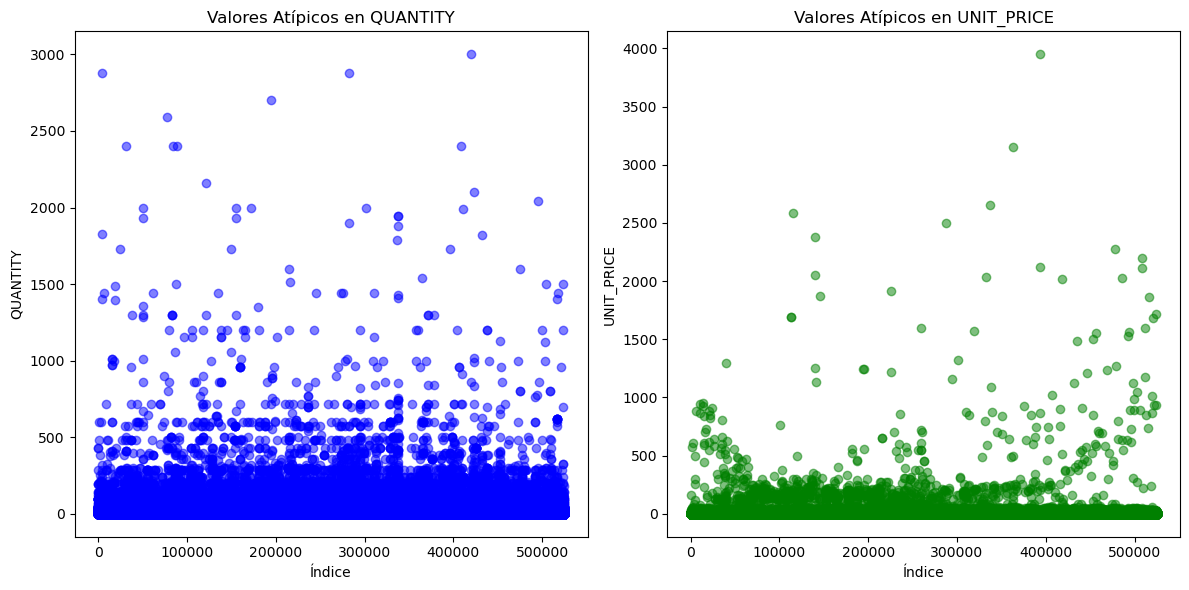

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Para verificar de manera gráfica la ausencia de valores atípicos en el conjunto de datos, se empleó un diagrama de dispersión. La observación de este diagrama permitió corroborar visualmente que no existían puntos que se alejaran significativamente del patrón general de la distribución de los datos, lo que confirma la efectividad del proceso de limpieza y filtrado previo.


## Segmentacion por grupos.
---
Se procedió a crear nuevas columnas en el conjunto de datos. Estas nuevas columnas, denominadas 'DAY', 'MONTH' y 'YEAR', permiten obtener una mayor granularidad en la información de fechas, brindando una perspectiva más precisa del comportamiento de las ventas a lo largo del tiempo. Adicionalmente, se integró una nueva columna titulada 'TOTAL_REVENUE', la cual refleja el total de ingresos generados por cada compra.  

In [40]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY_OF_WEEK'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
141398     548666      22858                  EASTER TIN KEEPSAKE        18  \
311931     564731      23202               JUMBO BAG VINTAGE LEAF        10   
196600     554083      22965   3 TRADITIONAl BISCUIT CUTTERS  SET         1   
305010     564037      22382           LUNCH BAG SPACEBOY DESIGN         10   
504974     579498      23084                   RABBIT NIGHT LIGHT      2040   
525266     580981      22596  CHRISTMAS STAR WISH LIST CHALKBOARD        12   
161174     550542      16235   RECYCLED PENCIL WITH RABBIT ERASER         4   
76734      542780      22804      CANDLEHOLDER PINK HANGING HEART         6   
93388      544393      22382           LUNCH BAG SPACEBOY DESIGN          5   
193255     553738      48187                  DOORMAT NEW ENGLAND         4   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION   
141398 2020-04-01 14:58:00        1.65      13124.0  United Kingdom  \
311931 2020-08-28 12:57:00        2.08      16186.0  United Kingdom   
196600 2020-05-22 11:51:00        2.10      18125.0  United Kingdom   
305010 2020-08-22 12:26:00        1.65      14800.0  United Kingdom   
504974 2020-11-29 15:52:00        1.79      12798.0           Japan   
525266 2020-12-06 16:02:00        0.39      16201.0  United Kingdom   
161174 2020-04-19 11:37:00        0.42          0.0  United Kingdom   
76734  2020-02-01 09:38:00        2.95      17675.0  United Kingdom   
93388  2020-02-18 11:56:00        1.65      16393.0  United Kingdom   
193255 2020-05-19 08:55:00        7.95      17469.0  United Kingdom   

        TOTAL_REVENUE  MONTH  YEAR  DAY_OF_WEEK  
141398          29.70      4  2020            2  
311931          20.80      8  2020            4  
196600           2.10      5  2020            4  
305010          16.50      8  2020            5  
504974        3651.60     11  2020            6  
525266           4.68     12  2020            6  
161174           1.68      4  2020            6  
76734           17.70      2  2020            5  
93388            8.25      2  2020            1  
193255          31.80      5  2020            1

# Métricas


##  Frequency. 
---

La métrica de FRECUENCY ofrece una valiosa perspectiva sobre el comportamiento de compra de los clientes. Se calcula mediante el conteo de las compras realizadas por un cliente individual, ya sea en términos de compras totales o compras de productos específicos. La elección del enfoque depende del objetivo del análisis y de la información que se desea obtener.


In [41]:
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 articulos mas vendidos',template='simple_white')
fig_coun.show()

Empleando técnicas de filtrado y agrupación de datos, se logró identificar con precisión los 10 artículos que registraron mayor volumen de ventas. Este proceso involucró la aplicación de criterios de selección específicos para aislar los artículos más relevantes y posteriormente organizarlos de acuerdo a su desempeño en ventas. La obtención de este ranking permite enfocar la atención en los productos más exitosos y tomar decisiones estratégicas para impulsar aún más su rendimiento.

In [42]:
#Cambio de tipo de datos 
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('int')
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('str')

In [43]:
top_10_products = df.groupby(['CUSTOMER_ID'])['INVOICE_NO'].count().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='INVOICE_NO',barmode='group',title='Top 10 clientes', template= 'simple_white')
fig_coun.update_layout(xaxis_title='Fecha')
fig_coun.show()

Mediante la implementación de estrategias de filtrado y agrupación de datos, se logró identificar con precisión a los 10 clientes que han demostrado la mayor lealtad hacia la marca. Este proceso involucró la aplicación de criterios de selección específicos para aislar a los clientes más fieles y posteriormente organizarlos en función de su comportamiento de compra. La obtención de este ranking permite enfocar esfuerzos de marketing y fidelización en los clientes más valiosos, optimizando así las estrategias de retención y fortaleciendo la relación con los clientes más comprometidos.

### Frecuencia por orden de compra


In [44]:
df_freq=df[df['CUSTOMER_ID']!='0']

In [45]:
df_freq.sort_values('INVOICE_NO')

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
535127     581587      22555            PLASTERS IN TIN STRONGMAN        12   
535126     581587      22556       PLASTERS IN TIN CIRCUS PARADE         12   
535138     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
535131     581587      22730           ALARM CLOCK BAKELIKE IVORY         4   
535139     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION   
0      2019-12-01 08:26:00        2.55       17850  United Kingdom  \
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
535127 2020-12-09 12:50:00        1.65       12680          France   
535126 2020-12-09 12:50:00        1.65       12680          France   
535138 2020-12-09 12:50:00        4.15       12680          France   
535131 2020-12-09 12:50:00        3.75       12680          France   
535139 2020-12-09 12:50:00        4.95       12680          France   

        TOTAL_REVENUE  MONTH  YEAR  DAY_OF_WEEK  
0               15.30     12  2019            6  
1               20.34     12  2019            6  
2               22.00     12  2019            6  
3               20.34     12  2019            6  
4               20.34     12  2019            6  
...               ...    ...   ...          ...  
535127          19.80     12  2020            2  
535126          19.80     12  2020            2  
535138          16.60     12  2020            2  
535131          15.00     12  2020            2  
535139          14.85     12  2020            2  

[392681 rows x 12 columns]

In [46]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO",template='simple_white', title='Distribución de facturas por cliente')
fig.show()

La gráfica muestra la distribución de facturas por cliente, donde la mayoría de los clientes tienen pocas facturas y unos pocos clientes tienen muchas. Esto sugiere que la mayoría son compradores ocasionales, mientras que unos pocos son clientes frecuentes. Esta información es útil para segmentar clientes, predecir el abandono y maximizar el valor del cliente a lo largo del tiempo en estrategias de marketing y retención.

In [47]:
df_frequency = df_frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'})

In [48]:
df=df.merge(df_frequency,on='CUSTOMER_ID')


##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

In [49]:
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 clientes con mayor monto de compra',template='simple_white')
fig_coun.show()

La gráfica muestra los "Top 10 clientes con mayor monto de compra". Los puntos clave son:

1.*Clientes Destacados*: Los clientes con IDs 14646 y 18102 son los que más han gastado, superando los 250k.

2.*Relevancia*: Estos clientes deben ser priorizados en estrategias de retención y fidelización.

3.*Segmentación*: Clasificados como "clientes VIP", requieren estrategias personalizadas para maximizar su valor a largo plazo.

### Histograma de ganancias

In [50]:
df_mon=df[df['CUSTOMER_ID']!='0']

In [51]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE",template='simple_white')
fig.show()

La gráfica muestra la distribución de ingresos totales por cliente. Los puntos clave son:

1. *Concentración de Ingresos*: La mayoría de los clientes tienen ingresos totales bajos, con una alta concentración cerca del origen.
2. *Pocos Clientes con Altos Ingresos*: Hay pocos clientes que generan ingresos significativamente altos.
3. *Relevancia*: Identificar a los clientes de alto ingreso es crucial para estrategias de retención y maximización del valor a largo plazo.

In [52]:
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 articulos con mayor ganancia',template='simple_white')
fig_coun.show()

La gráfica muestra los "Top 10 artículos con mayor ganancia". Los puntos clave son:

1. *Artículo Destacado*: "REGENCY CAKESTAND 3 TIER" es el artículo con la mayor ganancia, superando los 100k.
2. *Relevancia*: Estos artículos son los más rentables y deben ser prioritarios en estrategias de promoción y stock.
3. *Diversificación*: La lista incluye una variedad de productos, indicando múltiples fuentes de ingresos altos.

Identificar y priorizar los artículos más rentables es crucial para maximizar ganancias y optimizar inventarios.

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.

In [53]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE   
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30  \
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  
0     12  2019            6        297  
1     12  2019            6        297  
2     12  2019            6        297  
3     12  2019            6        297  
4     12  2019            6        297

In [54]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
orders_per_month.sort_index(ascending=False,inplace=True)
print(orders_per_month.head(12))
print()
mean_orders= orders_per_month['Orders_per_user'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
12            1264     919143.570       727.170546
11            1664    1156205.610       694.835102
10            1364    1026312.330       752.428394
9             1266     950690.202       750.940128
8              935     644051.040       688.824642
7              948     598771.741       631.615761
6              991     660046.050       666.040414
5             1055     666116.400       631.389953
4              856     461834.931       539.526789
3              974     594081.760       609.940205
2              757     442882.000       585.048877
1              740     484378.310       654.565284

Promedio de compra por mes: 661.0271744875253


In [55]:
fig_coun=px.bar(orders_per_month,x=orders_per_month.index,y='TOTAL_REVENUE',barmode='group',title='Ganancias por mes',template='simple_white')
fig_coun.show()

La gráfica muestra las ganancias por mes. Los puntos clave son:

1. *Meses Destacados*: Octubre y noviembre tienen las mayores ganancias, superando 1M.
2. *Relevancia*: Identificar los meses con mayores ingresos ayuda a planificar promociones y gestionar inventarios.
3. *Variación Mensual*: Hay un incremento en las ganancias en la segunda mitad del año.


Optimizar estrategias de marketing y stock en los meses con mayores ingresos puede maximizar las ganancias anuales.

In [56]:
fig = px.histogram(orders_per_month, x="Orders_per_user", title= 'Distribución de pedidos por usuarios', template='simple_white')
fig.show()

La gráfica muestra la distribución de la cantidad de pedidos por usuario en un rango de 500 a 800 pedidos. Los puntos clave son:

1. *Concentración de Pedidos*: La mayoría de los usuarios tienen entre 600 y 700 pedidos, con un pico notable en el rango de 600-649.
2. *Relevancia*: Identificar estos rangos de pedidos es crucial para entender el comportamiento de compra de los usuarios y planificar estrategias de marketing y retención.
3. *Variación*: Hay una menor cantidad de usuarios con pedidos fuera del rango de 600-700, indicando que la mayoría de los usuarios tienden a hacer un número similar de pedidos.

Conocer la distribución de pedidos por usuario ayuda a segmentar y dirigir estrategias específicas para maximizar el valor de cada grupo de usuarios.

### Dias sin comprar

In [57]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['RECENCY']=(df['INVOICE_DATE'].max()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  RECENCY
0          12347 2020-12-07 15:52:00        1
1          12348 2020-09-25 13:13:00       74
2          12349 2020-11-21 09:51:00       18
3          12350 2020-02-02 16:01:00      310
4          12352 2020-11-03 14:37:00       35
...          ...                 ...      ...
4331       18280 2020-03-07 09:52:00      277
4332       18281 2020-06-12 10:53:00      180
4333       18282 2020-12-02 11:43:00        7
4334       18283 2020-12-06 12:02:00        3
4335       18287 2020-10-28 09:29:00       42

[4336 rows x 3 columns]

In [58]:
df=df.merge(df_recency,on='CUSTOMER_ID')

In [59]:
df.drop(['INVOICE_DATE_y'],axis=1,inplace=True)

In [60]:
df.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY   
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       INVOICE_DATE_x  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE   
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30  \
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  RECENCY  
0     12  2019            6        297      372  
1     12  2019            6        297      372  
2     12  2019            6        297      372  
3     12  2019            6        297      372  
4     12  2019            6        297      372

In [61]:
df_recency_merged=df[df['CUSTOMER_ID']!='0']

In [62]:
fig = px.histogram(df_recency_merged, x="RECENCY", template='simple_white')
fig.update_layout(
    title='Distribución del tiempo desde la última compra',
    xaxis_title='RECENCY (días desde la última compra)',
    yaxis_title='Cantidad de Clientes'
)
fig.show()

La gráfica muestra la distribución de la recencia de compras de los clientes, donde "RECENCY" se refiere a los días transcurridos desde la última compra. Los puntos clave son:

1. *Concentración de Compras Recientes*: La mayoría de los clientes realizaron compras recientemente, con una alta concentración cerca del origen.
2. *Disminución Gradual*: Hay una disminución gradual en el número de clientes a medida que aumenta el tiempo desde la última compra.
3. *Relevancia*: Identificar a los clientes con compras recientes es crucial para campañas de re-engagement y retención.

Conocer la recencia de las compras ayuda a segmentar a los clientes y dirigir estrategias específicas para maximizar su valor y mejorar la retención.

## ¿Cúal es el país donde más se vende?

In [63]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país',template='simple_white')
fig_coun.update_layout(
    yaxis_title='GANANCIAS'
)
fig_coun.show()

La gráfica muestra las ventas totales por país (o región). Los puntos clave son:

1. *Ventas Predominantes en Reino Unido*: El Reino Unido tiene, por mucho, las ventas más altas, superando los 6 millones.
2. *Otros Países*: Los Países Bajos, EIRE (Irlanda), Alemania y Francia tienen ventas significativamente menores, pero son los siguientes más altos después del Reino Unido.
3. *Diversificación*: Las ventas en otros países como Australia, España, Suiza, Bélgica y Suecia son bajas en comparación con el Reino Unido.
4. *Relevancia*: Esta información es crucial para entender el mercado principal de la empresa y planificar estrategias de expansión o enfoque en mercados específicos.

El Reino Unido es el mercado principal, lo que sugiere que las estrategias de marketing y ventas deben enfocarse fuertemente allí. Sin embargo, existe potencial para crecer en otros mercados con ventas actuales más bajas.

In [64]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

1. *Ventas Predominantes en Reino Unido*: El Reino Unido tiene las ventas más altas, superando los 7 millones.
2. *Distribución Global*: Otros países muestran ventas significativamente menores.
3. *Escala de Colores*: Azul oscuro representa menores ingresos; amarillo representa los ingresos más altos.

El Reino Unido es el mercado principal. Hay oportunidades de crecimiento en otros países con ventas menores.

In [65]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Países con mayores ingresos en Europa',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

1. Ventas Predominantes en Reino Unido*: El Reino Unido tiene las ventas más altas, superando los 7 millones.
2. *Distribución en Europa*: Otros países europeos tienen ventas significativamente menores.
3. *Escala de Colores*: Azul oscuro representa menores ingresos; amarillo representa los ingresos más altos.

El Reino Unido es el mercado principal en Europa. Hay oportunidades de crecimiento en otros países europeos con ventas menores.

In [66]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='north america'
)

# Título del gráfico
fig.update_layout(
    title_text='Países con mayores ingresos en América',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

1. *Ventas Predominantes en Estados Unidos y Canadá*: Los países de América del Norte tienen ventas significativas.
2. *Distribución en América del Norte*: Las ventas están concentradas principalmente en Estados Unidos y Canadá, con menores ingresos en otros países.
3. *Escala de Colores*: Azul oscuro representa menores ingresos; amarillo representa los ingresos más altos.

Estados Unidos y Canadá son los mercados principales en América del Norte. Hay oportunidades de crecimiento en otros países con ventas menores.

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [67]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE_x',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE   
INVOICE_DATE_x                              
2019-12-01 08:26:00     536365     85123A  \
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536368      22912   

                                             DESCRIPTION  QUANTITY   
INVOICE_DATE_x                                                       
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6  \
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00       YELLOW COAT RACK PARIS FASHION         3   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE   
INVOICE_DATE_x                                                               
2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30  \
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        7.65       17850  United Kingdom          15.30   
2019-12-01 08:26:00        4.25       17850  United Kingdom          25.50   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:34:00        4.95       13047  United Kingdom          14.85   

                     MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  RECENCY  
INVOICE_DATE_x                                                     
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:26:00     12  2019            6        297      372  
2019-12-01 08:28:00     12  2019            6        297      372  
2019-12-01 08:28:00     12  2019            6        297      372  
2019-12-01 08:34:00     12  2019            6        172       31

## ¿En que mes se vende más cantidad de productos?

In [68]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [69]:
fig = px.line(df_series, markers=True,title='Serie de ventas',template='simple_white')
fig.show()

1. *Tendencia General*: Las ventas muestran fluctuaciones a lo largo del año 2020, con un aumento notable hacia finales del año.
2. *Picos y Valles*: Se observa un pico de ventas en noviembre de 2020, seguido de una caída abrupta en enero de 2021.
3. *Estacionalidad*: Hay un patrón de aumento en los ingresos durante la segunda mitad del año.

La gráfica muestra que las ventas aumentaron significativamente hacia el final de 2020, alcanzando su punto máximo en noviembre. Esto podría deberse a eventos estacionales como promociones de fin de año. La caída en enero de 2021 sugiere una disminución típica después de la temporada de compras navideñas. Esta información es útil para planificar estrategias de ventas y marketing en función de las tendencias estacionales.

## Eliminación de outliers de las nuevas variables

<Axes: title={'center': 'Boxplot de frecuencia de compras por cliente'}, xlabel='FREQUENCY'>

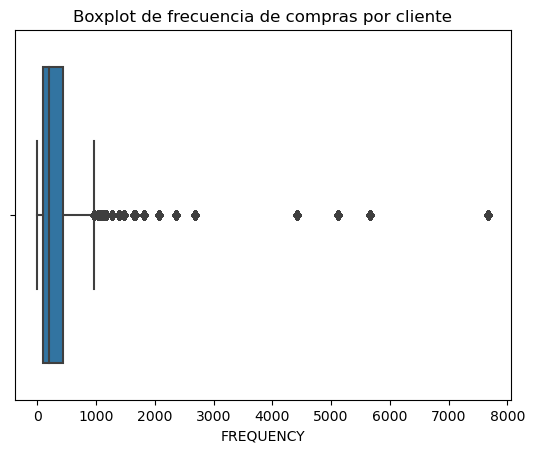

In [70]:
plt.title('Boxplot de frecuencia de compras por cliente')
sns.boxplot(x=df['FREQUENCY'])

1. *Distribución General*: La mayoría de los clientes tienen entre 0 y 1000 compras.
2. *Outliers*: Existen varios outliers con frecuencias de compra extremadamente altas, hasta 8000.
3. *Rango Intercuartílico (IQR)*: La caja muestra un IQR pequeño comparado con los outliers.

La mayoría de los clientes tienen frecuencias de compra bajas, pero unos pocos tienen frecuencias muy altas, indicando clientes muy valiosos.

<Axes: title={'center': 'Boxplot de ganancias por cliente'}, xlabel='TOTAL_REVENUE'>

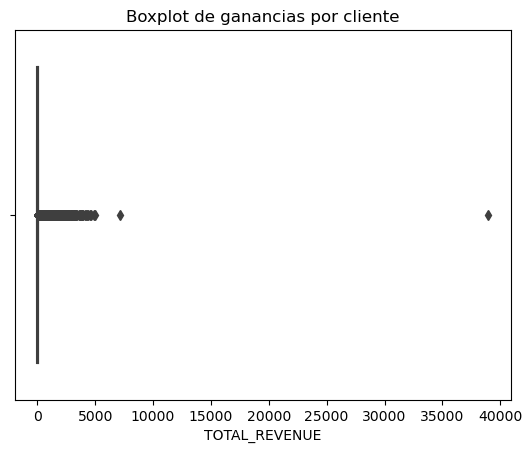

In [71]:
plt.title('Boxplot de ganancias por cliente')
sns.boxplot(x=df['TOTAL_REVENUE'])

1. *Distribución General*: La mayoría de los clientes generan ingresos totales bajos, concentrándose entre 0 y 5000.
2. *Outliers*: Hay varios outliers que generan ingresos significativamente más altos, hasta cerca de 40,000. Estos outliers representan a los clientes más valiosos.
3. *Rango Intercuartílico (IQR)*: La caja en el gráfico representa el rango intercuartílico, que es donde se encuentra el 50% central de los datos. El rango de este IQR es pequeño en comparación con los outliers.

La mayoría de los clientes generan ingresos totales bajos, pero unos pocos generan ingresos significativamente altos, indicando clientes muy valiosos. Esta información es crucial para segmentar clientes y diseñar estrategias específicas para aumentar los ingresos en segmentos menos activos.

<Axes: title={'center': 'Boxplot de días de desde la última compra por cliente'}, xlabel='RECENCY'>

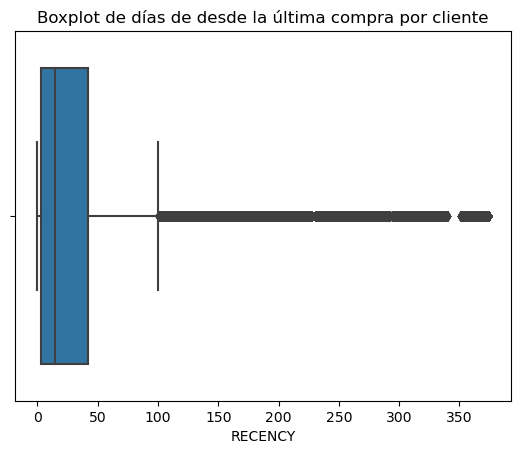

In [72]:
plt.title('Boxplot de días de desde la última compra por cliente')
sns.boxplot(x=df['RECENCY'])

1. *Distribución General*: La mayoría de los clientes han realizado compras recientemente, con recencias entre 0 y 50 días.
2. *Outliers*: Hay varios outliers que representan clientes que no han comprado en un tiempo significativamente mayor, hasta cerca de 350 días.
3. *Rango Intercuartílico (IQR)*: La caja muestra que el 50% central de los datos (IQR) está en un rango pequeño comparado con los outliers, indicando que la mayoría de las compras recientes están agrupadas en un corto período de tiempo.

La mayoría de los clientes han realizado compras recientemente, pero unos pocos no han comprado en un período de tiempo mucho más largo. Esta información es crucial para segmentar a los clientes y diseñar estrategias de re-engagement para aquellos que no han comprado recientemente.

## Segmentacion por clusteres.

In [73]:
# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = df.groupby('CUSTOMER_ID').agg({'TOTAL_REVENUE':'sum',
                                                                   'FREQUENCY':'unique',
                                                                   'RECENCY':'unique'}).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12347        4310.00     [182]     [1]
1       12348        1797.24      [31]    [74]
2       12349        1757.55      [73]    [18]
3       12350         334.40      [17]   [310]
4       12352        2506.04      [85]    [35]


In [74]:
def eliminacion_de_parentesis(df):
    df['FREQUENCY']=df['FREQUENCY'].astype('str')
    df['RECENCY']=df['RECENCY'].astype('str')

    df['FREQUENCY'] = df['FREQUENCY'].str.replace('[', '').str.replace(']', '')
    df['RECENCY'] = df['RECENCY'].str.replace('[', '').str.replace(']', '')

    df['FREQUENCY']=pd.to_numeric(df['FREQUENCY'])
    df['RECENCY']=pd.to_numeric(df['RECENCY'])

    return df

customer_data = eliminacion_de_parentesis(customer_data)
customer_data

CUSTOMER_ID  TOTAL_REVENUE  FREQUENCY  RECENCY
0          12347        4310.00        182        1
1          12348        1797.24         31       74
2          12349        1757.55         73       18
3          12350         334.40         17      310
4          12352        2506.04         85       35
...          ...            ...        ...      ...
4331       18280         180.60         10      277
4332       18281          80.82          7      180
4333       18282         178.05         12        7
4334       18283        2045.53        721        3
4335       18287        1837.28         70       42

[4336 rows x 4 columns]

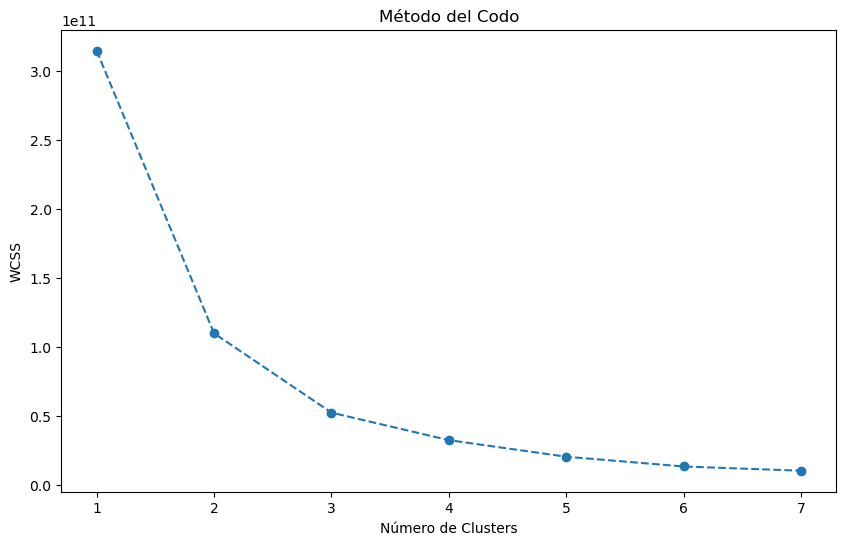

In [75]:
# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]

## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

1. *Propósito*: La gráfica muestra el Método del Codo para determinar el número óptimo de clusters en un análisis de clustering.
2. *Eje X*: Representa el número de clusters (k).
3. *Eje Y*: Representa la suma de los errores cuadráticos (inercia), una medida de la variación interna dentro de los clusters.
4. *Forma de Codo*: Se observa una curva que desciende rápidamente y luego se estabiliza. El "codo" de la gráfica es el punto donde la inercia deja de disminuir significativamente.

El "codo" se encuentra alrededor de 7 clusters. Este es el punto donde agregar más clusters no mejora significativamente la inercia, indicando que 7 es el número óptimo de clusters para este análisis.

In [76]:
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(features)
    print('Número de clústeres:', k) 
    print('Valor de la función objetivo', model.inertia_)

Número de clústeres: 1
Valor de la función objetivo 314755845283.0486
Número de clústeres: 2
Valor de la función objetivo 109631163690.54527
Número de clústeres: 3
Valor de la función objetivo 52890510321.37053
Número de clústeres: 4
Valor de la función objetivo 32794639479.144012
Número de clústeres: 5
Valor de la función objetivo 19546420360.85944
Número de clústeres: 6
Valor de la función objetivo 13738516907.914936
Número de clústeres: 7
Valor de la función objetivo 9933673648.677006


In [77]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(features)
print(kmeans.inertia_)


13181752091.67053


In [78]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['TOTAL_REVENUE','FREQUENCY','RECENCY'])
for i in centroids.columns:
    centroids[i]=centroids[i].astype('int')

In [79]:
# Añade una columna con el número de clúster
customer_data['CLUSTER'] = kmeans.labels_.astype(str)
centroids['CLUSTER'] = ['0 centroid', '1 centroid', '2 centroid','3 centroid','4 centroid', '5 centroid']

# Se necesitará reconfigurar el índice más tarde
data_all = pd.concat([customer_data, centroids], ignore_index=True)

In [80]:
centroids.sort_values('TOTAL_REVENUE')

TOTAL_REVENUE  FREQUENCY  RECENCY     CLUSTER
0            941         63       97  0 centroid
5           7358        309       22  5 centroid
3          28461        759       23  3 centroid
2          62611       1180        6  2 centroid
1         145056       2028        9  1 centroid
4         269931       1253        0  4 centroid

In [81]:
def categorizacion(df):
    if df['CLUSTER'] == '0':
        return 'Cliente Nuevo'
    elif df['CLUSTER'] == '1':
        return 'Cliente Black'
    elif df['CLUSTER'] == '2':
        return 'Cliente Gold'
    elif df['CLUSTER'] == '3':
        return 'Cliente Silver'
    elif df['CLUSTER'] == '4':
        return 'Cliente Platinum'
    else:
        return 'Cliente Bronce'

customer_data['CATEGORY'] = customer_data.apply(categorizacion, axis=1)

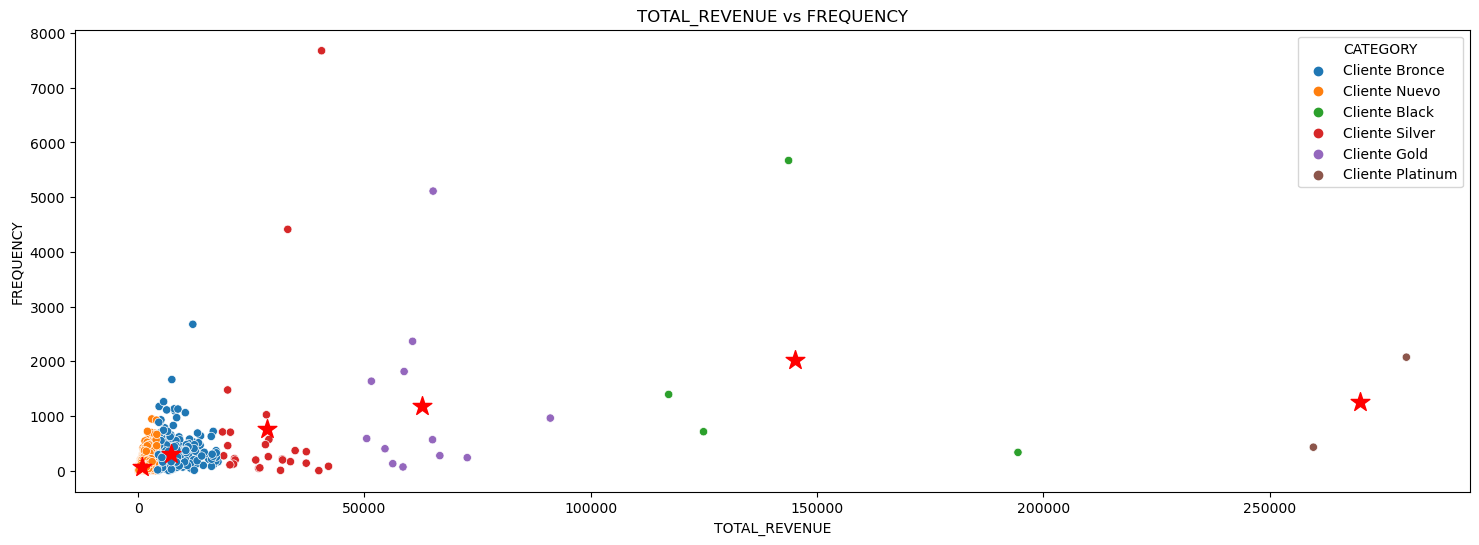

In [82]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='TOTAL_REVENUE', y='FREQUENCY', hue='CATEGORY', data=customer_data)
axs.scatter(centroids['TOTAL_REVENUE'], centroids['FREQUENCY'], marker='*', s=200, c='red')
axs.set_title('TOTAL_REVENUE vs FREQUENCY')

plt.show()


1. *Clientes Clave*: Clientes Platinum y Gold tienen altos ingresos con menor frecuencia de compras.
2. *Clientes Frecuentes*: Clientes Bronze y Nuevos tienen alta frecuencia de compras pero bajos ingresos.
3. *Outliers*: Algunos clientes tienen frecuencias y/o ingresos extremadamente altos.
4. *Clientes Platinum y Gold*: Generan altos ingresos.
5. *Clientes Bronze y Nuevos*: Compran frecuentemente pero generan menos ingresos.

*Estrategia*: Las estrategias pueden enfocarse en aumentar la frecuencia de compra de los clientes de alto ingreso (Platinum y Gold) y en aumentar los ingresos por compra de los clientes frecuentes (Bronze y Nuevos).

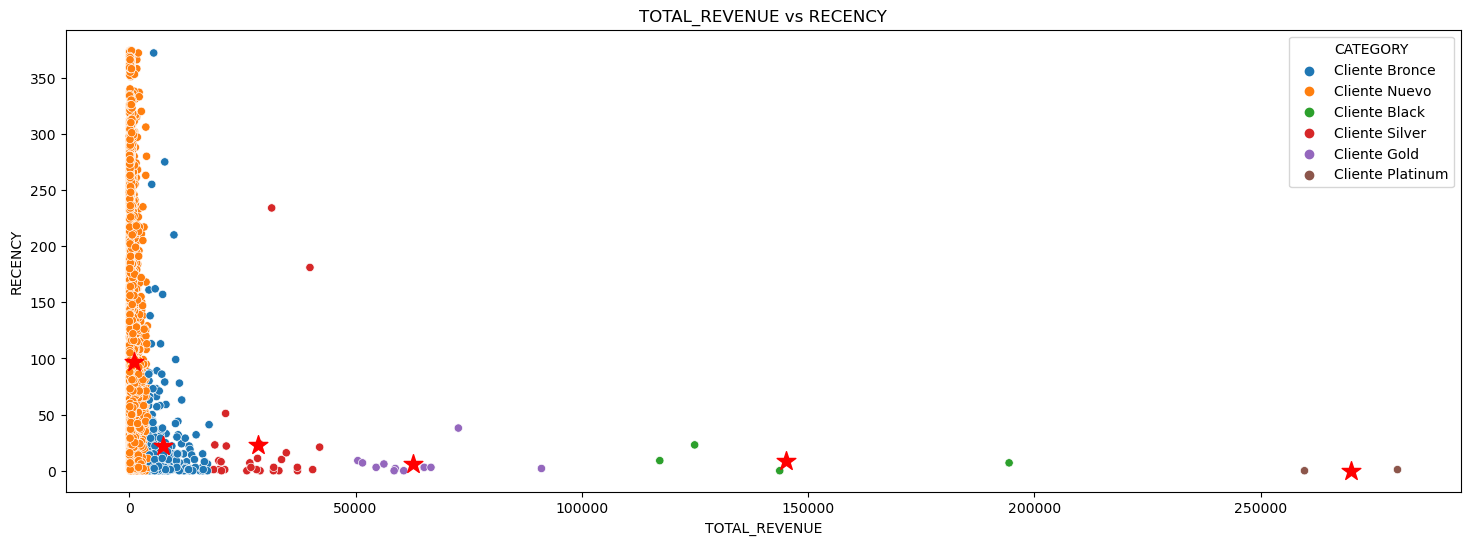

In [83]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='TOTAL_REVENUE', y='RECENCY', hue='CATEGORY', data=customer_data)
axs.scatter(centroids['TOTAL_REVENUE'], centroids['RECENCY'], marker='*', s=200, c='red')
axs.set_title('TOTAL_REVENUE vs RECENCY')

plt.show()

1. *Clientes Clave*: Clientes Platinum y Gold tienen altos ingresos y bajas recencias, indicando compras recientes.
2. *Clientes Nuevos y Bronze*: Alta recencia y bajos ingresos, indicando menos compras recientes.
3. *Outliers*: Algunos clientes tienen ingresos y recencias extremadamente altos.
4. *Clientes Platinum y Gold*: Compran recientemente y generan altos ingresos.
5. *Clientes Nuevos y Bronze*: Tienen menos compras recientes y generan bajos ingresos.

*Estrategia*: Enfocar en mantener la lealtad de clientes de altos ingresos y reactivar clientes con alta recencia.

In [84]:
# Asumiendo que 'customer_data' es tu DataFrame
# Calcula el recuento y el porcentaje de cada categoría
rank_categories = customer_data['CATEGORY'].value_counts().reset_index()
rank_categories.columns = ['CATEGORY', 'COUNT']
rank_categories['PERCENTAGE'] = (rank_categories['COUNT'] / rank_categories['COUNT'].sum()) * 100

# Crea el gráfico de barras
fig_coun = px.bar(rank_categories, x='CATEGORY', y='COUNT', text='PERCENTAGE',
                  barmode='group', title='Clientes por categoria', template='simple_white')

# Añade el porcentaje como texto en las barras
fig_coun.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Muestra el gráfico
fig_coun.show()

1. *Clientes Nuevos*: Constituyen el 91.9% del total de clientes.
2. *Clientes Bronze*: Representan el 6.99% del total.
3. *Otras Categorías*: Clientes Silver, Gold, Black y Platinum representan un porcentaje muy pequeño del total (menos del 1% cada uno).
4. *Clientes Nuevos*: Dominan la base de clientes.

*Estrategia*: Enfocar esfuerzos en convertir a los Clientes Nuevos en categorías superiores para aumentar su valor y retención.

In [85]:
# Calcula el total de ingresos y el porcentaje de cada categoría
money_categories = customer_data.groupby('CATEGORY', as_index=False)['TOTAL_REVENUE'].sum()
money_categories['PERCENTAGE'] = (money_categories['TOTAL_REVENUE'] / money_categories['TOTAL_REVENUE'].sum()) * 100

# Ordena por ingresos totales
money_categories = money_categories.sort_values(by='TOTAL_REVENUE')

# Crea el gráfico de barras
fig_coun = px.bar(money_categories, x='CATEGORY', y='TOTAL_REVENUE', text='PERCENTAGE',
                  barmode='group', title='Ingresos recibidos por categoria', template='simple_white')

# Añade el porcentaje como texto en las barras
fig_coun.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Muestra el gráfico
fig_coun.show()

1. *Clientes Nuevos*: Generan el 43.52% de los ingresos totales.
2. *Clientes Bronze*: Contribuyen con el 25.80% de los ingresos.
3. *Otras Categorías*: Clientes Silver, Gold, Black y Platinum generan entre el 6.27% y el 8.93% de los ingresos cada uno.
4. *Clientes Nuevos y Bronze*: Son las principales fuentes de ingresos.

*Estrategia*: Incrementar los ingresos de las categorías menos contribuyentes y convertir a los Clientes Nuevos en clientes de categorías superiores para maximizar su valor.